In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

pd.options.mode.chained_assignment = None

df=pd.read_csv(r'C:\Users\Cynder\Downloads\5 years sp500.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Close Change %,Volume,Weekday,High % Above Open,Unnamed: 9
0,"Thursday, January 05, 2023","3,840.09","3,840.09","3,802.42","3,808.10",-1.16%,"2,259,316,692",Thursday,0.000000,NaN
1,"Wednesday, January 04, 2023","3,842.21","3,873.16","3,815.77","3,852.97",0.75%,"2,595,164,544",Wednesday,0.805526,NaN
2,"Tuesday, January 03, 2023","3,854.97","3,878.46","3,794.33","3,824.14",-0.40%,"2,353,396,979",Tuesday,0.609343,NaN
3,"Friday, December 30, 2022","3,828.85","3,839.85","3,800.34","3,839.50",-0.25%,"1,706,136,061",Friday,0.287293,NaN
4,"Thursday, December 29, 2022","3,805.40","3,858.19","3,805.40","3,849.28",1.75%,"1,735,156,616",Thursday,1.387239,NaN


In [3]:
df.dtypes

Date                  object
Open                  object
High                  object
Low                   object
Close                 object
Close Change %        object
Volume                object
Weekday               object
High % Above Open    float64
Unnamed: 9           float64
dtype: object

In [4]:
df = df.drop(df.columns[[0, 9]], axis=1)
df.dtypes

Open                  object
High                  object
Low                   object
Close                 object
Close Change %        object
Volume                object
Weekday               object
High % Above Open    float64
dtype: object

In [5]:
df = df.replace(',','', regex=True)
df.head()

,Open,High,Low,Close,Close Change %,Volume,Weekday,High % Above Open
0,3840.09,3840.09,3802.42,3808.10,-1.16%,2259316692,Thursday,0.000000
1,3842.21,3873.16,3815.77,3852.97,0.75%,2595164544,Wednesday,0.805526
2,3854.97,3878.46,3794.33,3824.14,-0.40%,2353396979,Tuesday,0.609343
3,3828.85,3839.85,3800.34,3839.50,-0.25%,1706136061,Friday,0.287293
4,3805.40,3858.19,3805.40,3849.28,1.75%,1735156616,Thursday,1.387239


In [6]:
df = df.replace('%','', regex=True)
df.head()

,Open,High,Low,Close,Close Change %,Volume,Weekday,High % Above Open
0,3840.09,3840.09,3802.42,3808.10,-1.16,2259316692,Thursday,0.000000
1,3842.21,3873.16,3815.77,3852.97,0.75,2595164544,Wednesday,0.805526
2,3854.97,3878.46,3794.33,3824.14,-0.40,2353396979,Tuesday,0.609343
3,3828.85,3839.85,3800.34,3839.50,-0.25,1706136061,Friday,0.287293
4,3805.40,3858.19,3805.40,3849.28,1.75,1735156616,Thursday,1.387239


In [7]:
df['Open']=df['Open'].astype('float64')
df['High']=df['High'].astype('float64')
df['Low']=df['Low'].astype('float64')
df['Close']=df['Close'].astype('float64')
df['Close Change %']=df['Close Change %'].astype('float64')
df['Volume']=df['Volume'].astype('int64')
df.head()

,Open,High,Low,Close,Close Change %,Volume,Weekday,High % Above Open
0,3840.09,3840.09,3802.42,3808.10,-1.16,2259316692,Thursday,0.000000
1,3842.21,3873.16,3815.77,3852.97,0.75,2595164544,Wednesday,0.805526
2,3854.97,3878.46,3794.33,3824.14,-0.40,2353396979,Tuesday,0.609343
3,3828.85,3839.85,3800.34,3839.50,-0.25,1706136061,Friday,0.287293
4,3805.40,3858.19,3805.40,3849.28,1.75,1735156616,Thursday,1.387239


In [8]:
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Close Change %       float64
Volume                 int64
Weekday               object
High % Above Open    float64
dtype: object

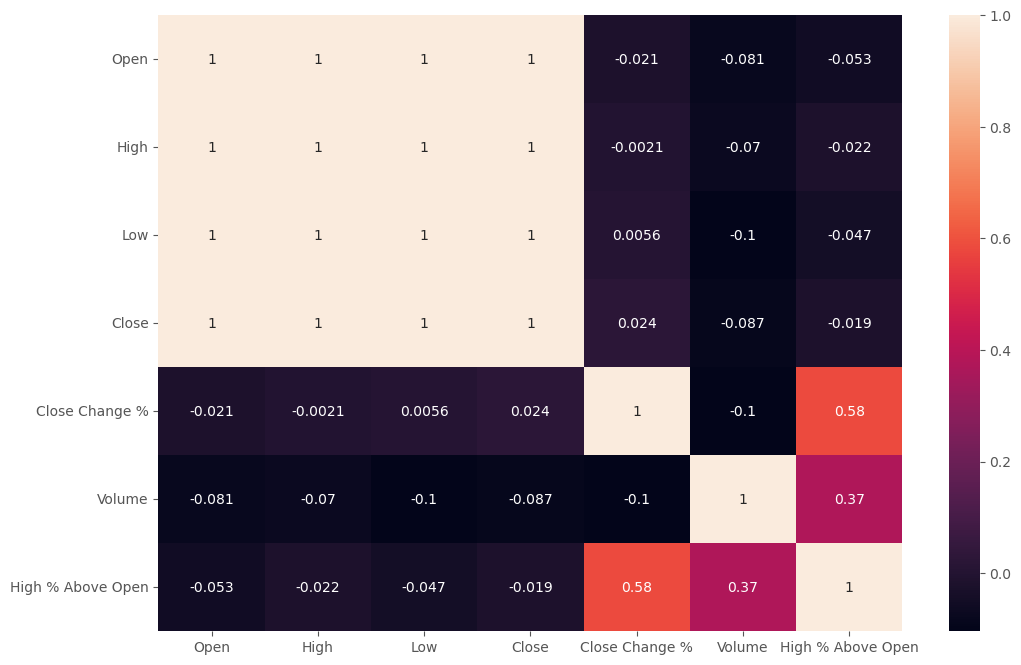

In [9]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [10]:
df_weekday = df


for col_name in df_weekday.columns:
    if(df_weekday[col_name].dtype == 'object'):
        df_weekday[col_name]= df_weekday[col_name].astype('category')
        df_weekday[col_name] = df_weekday[col_name].cat.codes
        
df_weekday

,Open,High,Low,Close,Close Change %,Volume,Weekday,High % Above Open
0,3840.09,3840.09,3802.42,3808.10,-1.16,2259316692,2,0.000000
1,3842.21,3873.16,3815.77,3852.97,0.75,2595164544,4,0.805526
2,3854.97,3878.46,3794.33,3824.14,-0.40,2353396979,3,0.609343
3,3828.85,3839.85,3800.34,3839.50,-0.25,1706136061,0,0.287293
4,3805.40,3858.19,3805.40,3849.28,1.75,1735156616,2,1.387239
...,...,...,...,...,...,...,...,...
1254,2770.18,2787.85,2769.64,2786.24,0.67,2129410147,0,0.637865
1255,2752.97,2767.56,2752.78,2767.56,0.70,1975974166,2,0.529973
1256,2745.55,2750.80,2736.06,2748.23,-0.11,2091186564,4,0.191219
1257,2751.15,2759.14,2747.86,2751.29,0.13,2022846957,3,0.290424


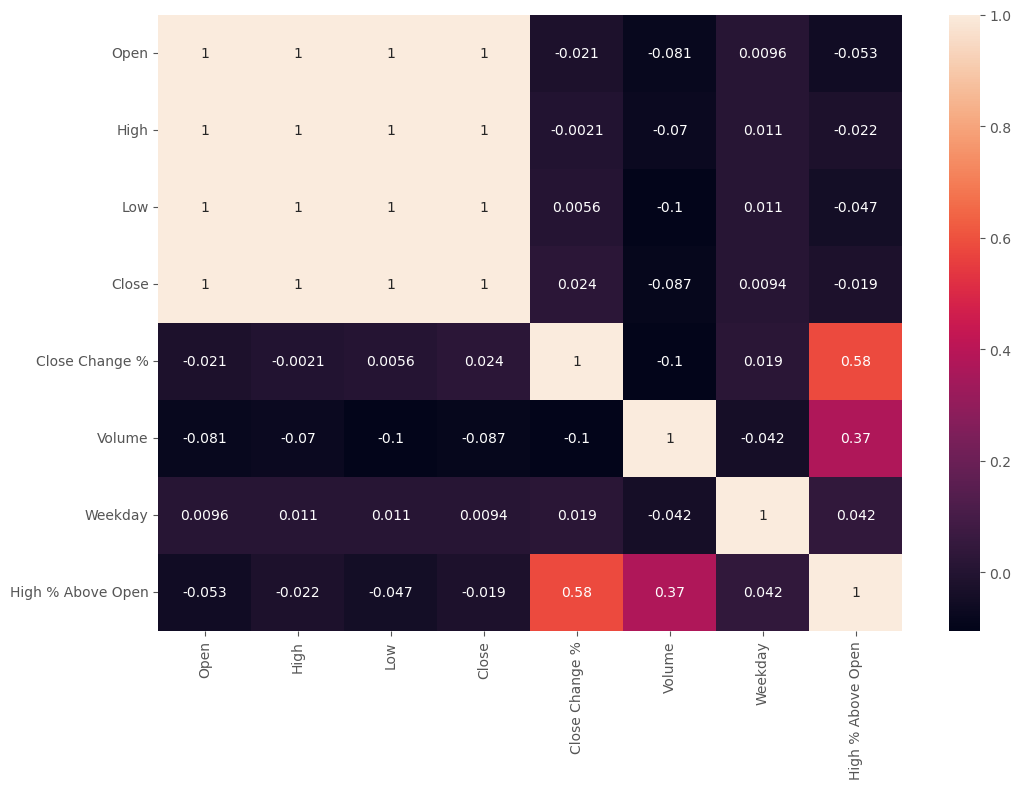

In [11]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

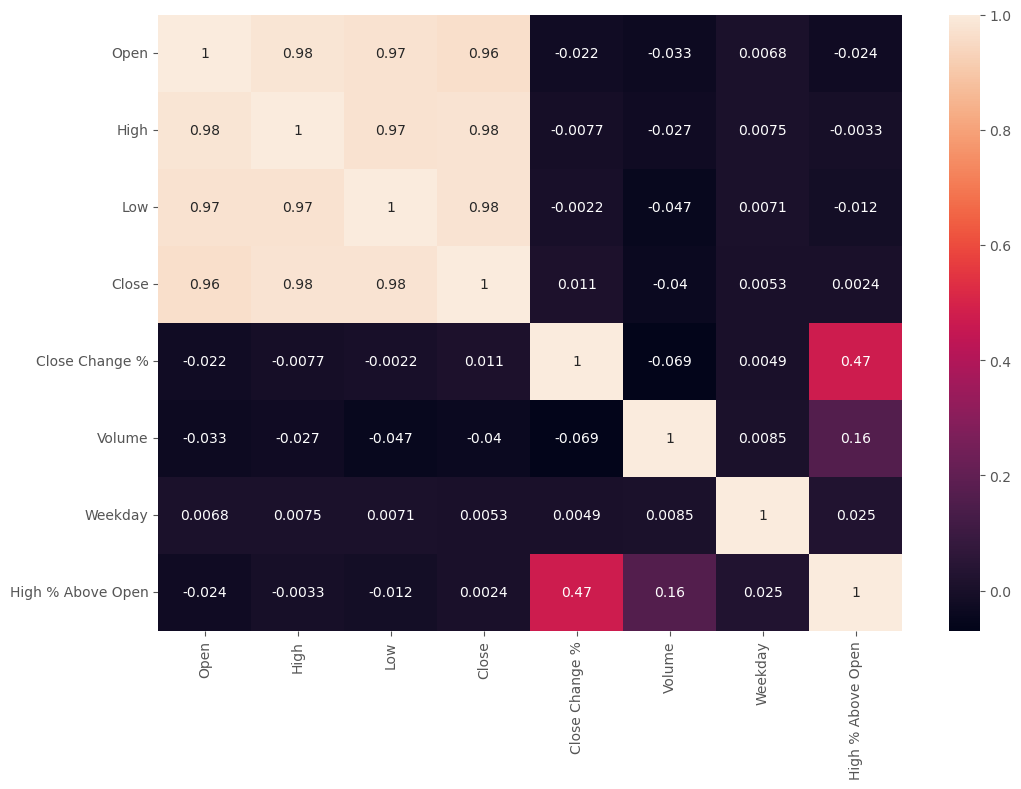

In [12]:
correlation_matrix=df.corr(method='kendall')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

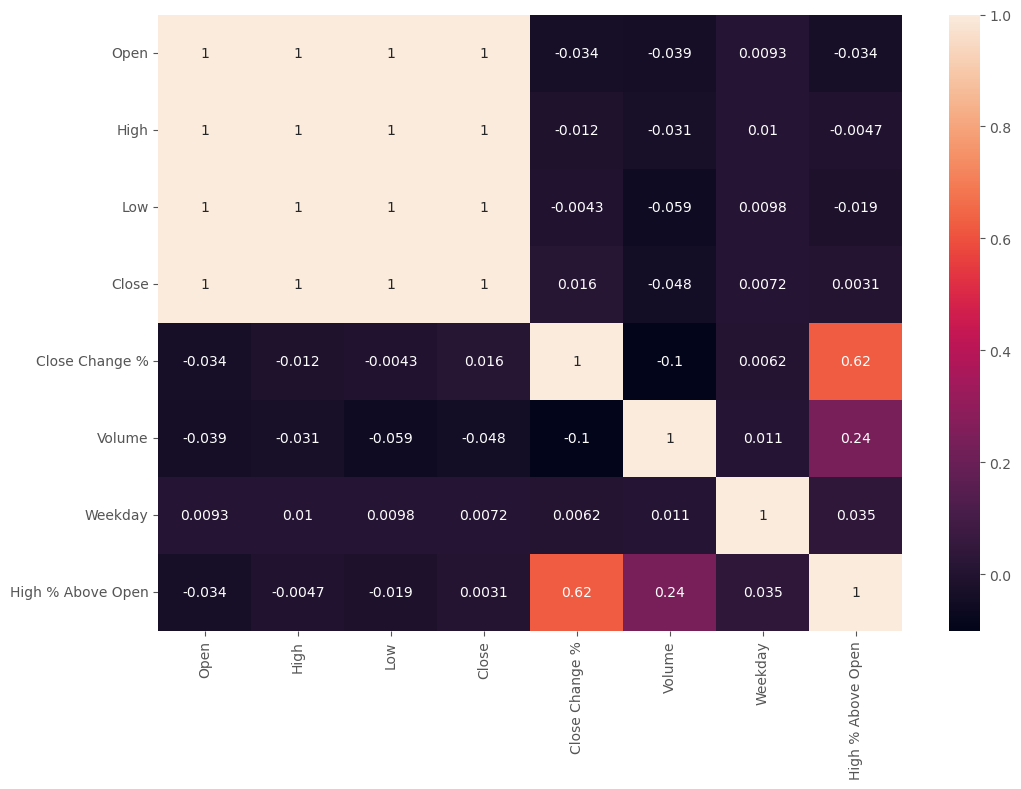

In [13]:
correlation_matrix=df.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True)

plt.show()